# Statistics_For_Data_Analysis_Part5

# Understanding Outliers and their impact

Certainly! Here's an explanation of understanding outliers and their impact:

1. Outliers:
   - Example: Consider the following set of numbers: 5, 10, 15, 20, 100.
   - An outlier is a data point that significantly differs from other observations in a dataset.
   - It may be an unusually high or low value compared to the rest of the data.
   - Outliers can distort statistical analyses and lead to incorrect conclusions if not properly identified and managed.

2. Impact of Outliers:
   - Outliers can affect measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation).
   - They can skew the distribution and make it non-normal, affecting the interpretation of statistical tests and models.
   - Outliers can influence correlation coefficients and regression analyses, leading to biased results.
   - However, outliers may also contain valuable information or indicate errors in the data collection process.

Understanding outliers and their impact is crucial for robust data analysis. It involves identifying, analyzing, and, if necessary, addressing outliers to ensure the accuracy and reliability of statistical analyses and conclusions. Various techniques, such as visualization, statistical tests, and domain knowledge, can be employed to handle outliers effectively.

/tmp/ipykernel_18/2882906167.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  original_option = pd.get_option('mode.use_inf_as_na')
/tmp/ipykernel_18/2882906167.py:11: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


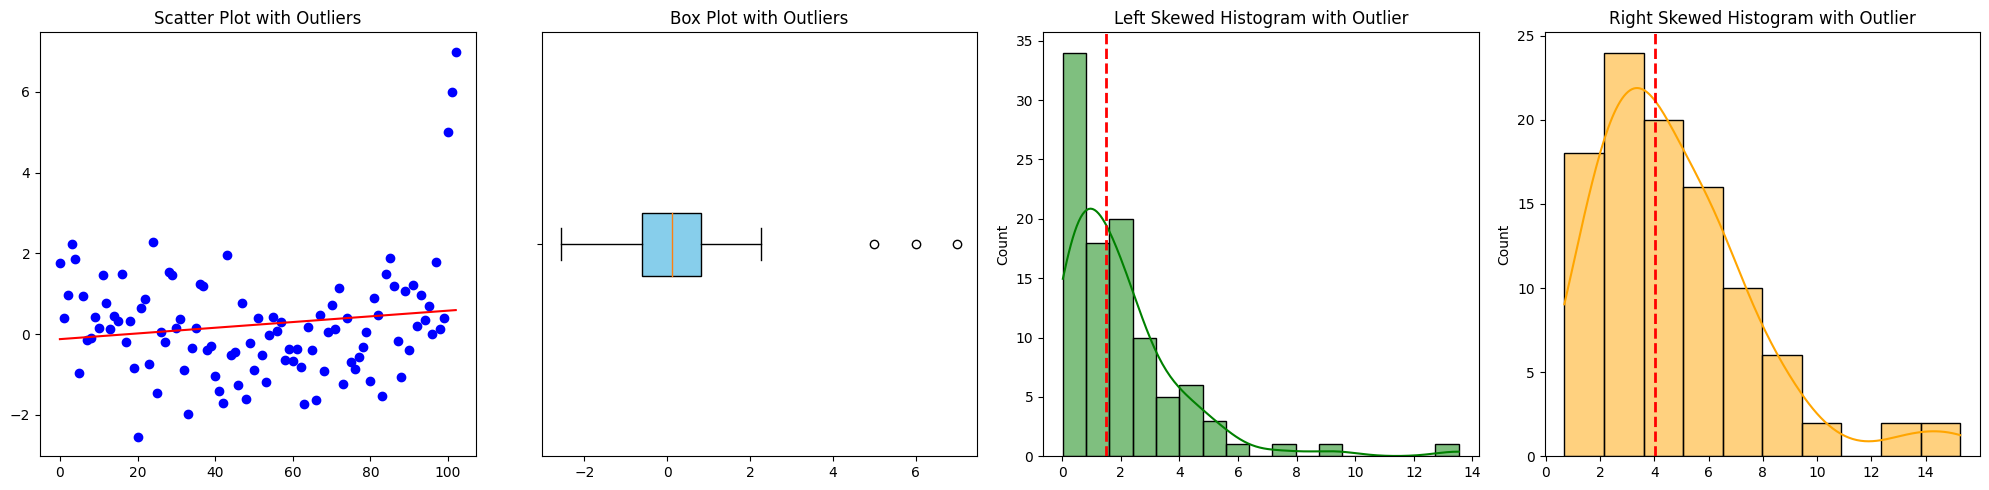

/tmp/ipykernel_18/2882906167.py:47: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', original_option)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd

# Store the original value of the deprecated option
original_option = pd.get_option('mode.use_inf_as_na')

# Set the deprecated option to True explicitly
pd.set_option('mode.use_inf_as_na', True)

# Sample data
np.random.seed(0)
data_outlier = np.concatenate([np.random.normal(0, 1, 100), [5, 6, 7]])
data_left_skewed = np.random.chisquare(2, 100)
data_right_skewed = np.random.chisquare(5, 100)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Scatter plot with outliers and regression line
axs[0].scatter(range(len(data_outlier)), data_outlier, color='blue')
axs[0].set_title('Scatter Plot with Outliers')
slope, intercept, _, _, _ = linregress(range(len(data_outlier)), data_outlier)
axs[0].plot(range(len(data_outlier)), slope * range(len(data_outlier)) + intercept, color='red')

# Box plot with outliers (vertical)
axs[1].boxplot(data_outlier, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axs[1].set_title('Box Plot with Outliers')
axs[1].set_yticklabels([''])

# Left skewed histogram with outlier
sns.histplot(data_left_skewed, ax=axs[2], color='green', kde=True)
axs[2].axvline(np.median(data_left_skewed), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[2].set_title('Left Skewed Histogram with Outlier')

# Right skewed histogram with outlier
sns.histplot(data_right_skewed, ax=axs[3], color='orange', kde=True)
axs[3].axvline(np.median(data_right_skewed), color='red', linestyle='dashed', linewidth=2, label='Median')
axs[3].set_title('Right Skewed Histogram with Outlier')

plt.tight_layout()
plt.show()

# Revert the deprecated option back to its original value
pd.set_option('mode.use_inf_as_na', original_option)


# Removing Outliers

Removing outliers from a dataset is a common practice in data analysis, particularly when the outliers significantly skew the distribution or affect the accuracy of statistical measures. Here's how you can approach removing outliers:

1. **Identify Outliers**: Before removing outliers, it's crucial to identify them. Outliers are data points that lie significantly outside the overall pattern of the data. They can be detected using statistical methods such as the Z-score, which measures how many standard deviations a data point is from the mean, or the interquartile range (IQR) method, which defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

2. **Choose Removal Method**: Once outliers are identified, decide on the method for removing them. You can either:
   - **Delete**: Simply remove the outlier data points from the dataset. This method is straightforward but may result in loss of information, especially if the outliers represent valid data points.
   - **Transform**: Transform the outliers using a mathematical function. For example, you can replace outliers with the mean, median, or a predefined value, or apply a log transformation to reduce their impact.
   - **Winsorization**: Winsorization involves replacing outliers with a predefined percentile value. For example, you can replace outliers with the nearest value at the 95th percentile (upper winsorization) or the 5th percentile (lower winsorization).

3. **Apply Removal**: Implement the chosen removal method to eliminate outliers from the dataset.

4. **Evaluate Impact**: After removing outliers, it's essential to evaluate the impact on the dataset. Check how the removal affects statistical measures, distributions, and overall analysis results. Ensure that the removal process does not introduce bias or significantly alter the characteristics of the data.

5. **Document**: Document the outlier removal process, including the method used, criteria for identifying outliers, and rationale for removal. Transparency in data preprocessing steps is crucial for reproducibility and understanding the analysis.

By following these steps, you can effectively remove outliers from your dataset while preserving the integrity and reliability of your analysis results.